In [2]:
%matplotlib inline
import networkx as nx
import math
from matplotlib import pyplot as plot
from collections import deque

In [3]:
def heuristic(a, b):
    # Euclidean distance for graph nodes
    (x1, y1) = a
    (x2, y2) = b
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

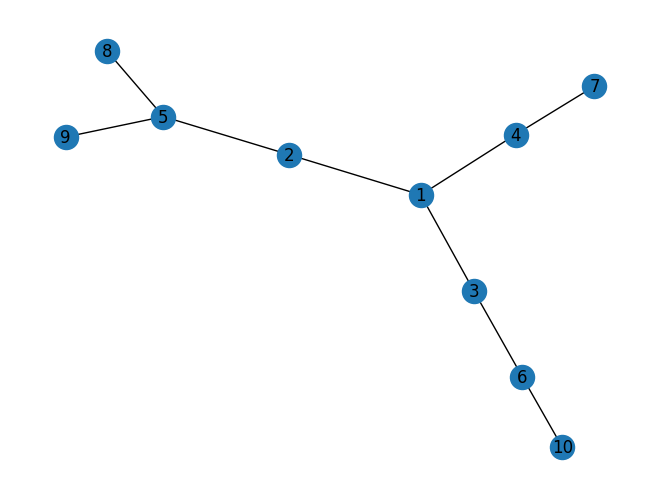

In [4]:
graph = nx.Graph({
    '1': ['2', '3', '4'],
    '2': ['5'],
    '3': ['6'],
    '4': ['7'],
    '5': ['8', '9'],
    '6': ['10'],
    '7': [],
    '8': [],
    '9': [],
    '10': []
})
nx.draw(graph, with_labels=True)

q = deque()